In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

## Carga de información

In [5]:
laliga2122 = pd.read_excel('datos_liga_espaniola/LaLiga21 22.xlsx', ).dropna(how='all')
laliga2021 = pd.read_excel('datos_liga_espaniola/LaLiga20 21.xlsx', ).dropna(how='all')
laliga1920 = pd.read_excel('datos_liga_espaniola/LaLiga19 20.xlsx', ).dropna(how='all')
laliga1819 = pd.read_excel('datos_liga_espaniola/LaLiga18 19.xlsx', ).dropna(how='all')
laliga1718 = pd.read_excel('datos_liga_espaniola/LaLiga17 18.xlsx', ).dropna(how='all')
laliga1617 = pd.read_excel('datos_liga_espaniola/LaLiga16 17.xlsx', ).dropna(how='all')
seg2122 =  pd.read_excel('datos_liga_espaniola/LaLiga123 21 22.xlsx', ).dropna(how='all')
seg2021 =  pd.read_excel('datos_liga_espaniola/LaLiga123 20 21.xlsx', ).dropna(how='all')
seg1920 =  pd.read_excel('datos_liga_espaniola/LaLiga123 19 20.xlsx', ).dropna(how='all')
seg1819 =  pd.read_excel('datos_liga_espaniola/LaLiga123 18 19.xlsx', ).dropna(how='all')
seg1718 =  pd.read_excel('datos_liga_espaniola/LaLiga123 17 18.xlsx', ).dropna(how='all')
seg1617 =  pd.read_excel('datos_liga_espaniola/LaLiga123 16 17.xlsx', ).dropna(how='all')

## Creando dataframes

In [8]:
# laliga = laliga2122.dropna(how='all').append(laliga2021.dropna(how='all')
# ).append(laliga1920.dropna(how='all')).append(laliga1819.dropna(how='all')
# ).append(laliga1718.dropna(how='all')).append(laliga1617.dropna(how='all')).loc[:,
# ['Wk','Date','Local','Score','Visitante', 'Attendance']]
# laliga['Attendance']= laliga['Attendance']*1000
# laliga['Torneo'] = 'Primera división'
laliga2122 = pd.read_excel('datos_liga_espaniola/LaLiga21 22.xlsx', ).dropna(how='all')
laliga2021 = pd.read_excel('datos_liga_espaniola/LaLiga20 21.xlsx', ).dropna(how='all')
laliga1920 = pd.read_excel('datos_liga_espaniola/LaLiga19 20.xlsx', ).dropna(how='all')
laliga1819 = pd.read_excel('datos_liga_espaniola/LaLiga18 19.xlsx', ).dropna(how='all')
laliga1718 = pd.read_excel('datos_liga_espaniola/LaLiga17 18.xlsx', ).dropna(how='all')
laliga1617 = pd.read_excel('datos_liga_espaniola/LaLiga16 17.xlsx', ).dropna(how='all')
seg2122 =  pd.read_excel('datos_liga_espaniola/LaLiga123 21 22.xlsx', ).dropna(how='all')
seg2021 =  pd.read_excel('datos_liga_espaniola/LaLiga123 20 21.xlsx', ).dropna(how='all')
seg1920 =  pd.read_excel('datos_liga_espaniola/LaLiga123 19 20.xlsx', ).dropna(how='all')
seg1819 =  pd.read_excel('datos_liga_espaniola/LaLiga123 18 19.xlsx', ).dropna(how='all')
seg1718 =  pd.read_excel('datos_liga_espaniola/LaLiga123 17 18.xlsx', ).dropna(how='all')
seg1617 =  pd.read_excel('datos_liga_espaniola/LaLiga123 16 17.xlsx', ).dropna(how='all')

laliga = pd.concat([
    laliga2122,
    laliga2021,
    laliga1920,
    laliga1819,
    laliga1718,
    laliga1617
], ignore_index=True).loc[:,['Wk','Date','Local','Score','Visitante', 'Attendance']]
laliga['Attendance']= laliga['Attendance']*1000
laliga['Torneo'] = 'Primera división'

In [9]:
segunda = pd.concat([
    
    seg2122,
    seg2021,
    seg1920,
    seg1819,
    seg1718,
    seg1617
], ignore_index=True).loc[:,
['Wk','Date','Local','Score','Visitante', 'Attendance']]
segunda['Attendance']= segunda['Attendance']*1000
segunda['Torneo'] = 'Segunda división'

In [10]:
partidos6t = pd.concat([laliga,segunda],axis = 0)
partidos6t

,Wk,Date,Local,Score,Visitante,Attendance,Torneo
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división
...,...,...,...,...,...,...,...
2731,42.0,2017-06-10,Valladolid,1–0,Cádiz,12812.0,Segunda división
2732,42.0,2017-06-10,Gimnàstic,1–0,UCAM Murcia,11103.0,Segunda división
2733,42.0,2017-06-10,Alcorcón,3–0,Lugo,4262.0,Segunda división
2734,42.0,2017-06-10,Córdoba,2–1,Girona,8977.0,Segunda división


## Creando nuevas columnas

In [11]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])
def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

partidos6t['Goles Local'] = partidos6t['Score'].apply(goleslocal)
partidos6t['Goles Visitante'] = partidos6t['Score'].apply(golesvisita)
partidos6t['Total goles partido']= partidos6t['Goles Local']+partidos6t['Goles Visitante']


In [12]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
partidos6t['Año'] = partidos6t['Date'].dt.year
partidos6t['Mes'] = partidos6t['Date'].dt.month
partidos6t['Temporada'] = partidos6t.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)


In [13]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    
partidos6t['Resultado'] = partidos6t['Score'].apply(resultado)
partidos6t['Ganador'] = partidos6t.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)



In [14]:
def intervalos(score):
    goles = score.split('–')
    total_goles = int(goles[0])+int(goles[1])
    if total_goles <1:
        return '0'
    elif total_goles<2:
        return '1'
    elif total_goles<3:
        return '2'
    elif total_goles<4:
        return '3'
    elif total_goles>=4:
        return '4+'
    
partidos6t['Clasificación goles'] = partidos6t['Score'].apply(intervalos)

In [15]:
partidos6t['0 gol'] = partidos6t.apply(lambda x: 1 if x['Total goles partido'] == 0 else 0,axis=1)
partidos6t['1 gol'] = partidos6t.apply(lambda x: 1 if x['Total goles partido'] == 1 else 0,axis=1)
partidos6t['2 gol'] = partidos6t.apply(lambda x: 1 if x['Total goles partido'] == 2 else 0,axis=1)
partidos6t['3 gol'] = partidos6t.apply(lambda x: 1 if x['Total goles partido'] == 3 else 0,axis=1)
partidos6t['4+gol'] = partidos6t.apply(lambda x: 1 if x['Total goles partido'] >= 4 else 0,axis=1)
partidos6t

,Wk,Date,Local,Score,Visitante,Attendance,Torneo,Goles Local,Goles Visitante,Total goles partido,...,Mes,Temporada,Resultado,Ganador,Clasificación goles,0 gol,1 gol,2 gol,3 gol,4+gol
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división,1,0,1,...,8,21/22,Local,Valencia,1,0,1,0,0,0
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división,1,1,2,...,8,21/22,Empate,Empate,2,0,0,1,0,0
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división,1,1,2,...,8,21/22,Empate,Empate,2,0,0,1,0,0
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división,0,0,0,...,8,21/22,Empate,Empate,0,1,0,0,0,0
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división,1,4,5,...,8,21/22,Visitante,Real Madrid,4+,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,42.0,2017-06-10,Valladolid,1–0,Cádiz,12812.0,Segunda división,1,0,1,...,6,16/17,Local,Valladolid,1,0,1,0,0,0
2732,42.0,2017-06-10,Gimnàstic,1–0,UCAM Murcia,11103.0,Segunda división,1,0,1,...,6,16/17,Local,Gimnàstic,1,0,1,0,0,0
2733,42.0,2017-06-10,Alcorcón,3–0,Lugo,4262.0,Segunda división,3,0,3,...,6,16/17,Local,Alcorcón,3,0,0,0,1,0
2734,42.0,2017-06-10,Córdoba,2–1,Girona,8977.0,Segunda división,2,1,3,...,6,16/17,Local,Córdoba,3,0,0,0,1,0


## Agrupando data

In [17]:
analisis = partidos6t.groupby(['Resultado']).agg(suma1=('0 gol',lambda x:np.sum(x)), 
suma2=('1 gol',lambda x:np.sum(x)), suma3 = ('2 gol',lambda x:np.sum(x)), suma4=('3 gol',lambda x:np.sum(x)),
suma5=('4+gol',lambda x:np.sum(x)),Total = ('Wk','count')).reset_index().set_axis(['Resultado', '0 gol','1 gol', '2 gol','3 gol','4+gol','Total'],axis=1)

analisis

,Resultado,0 gol,1 gol,2 gol,3 gol,4+gol,Total
0,Empate,471,0,689,0,289,1449
1,Local,0,645,420,643,537,2245
2,Visitante,0,417,219,395,291,1322


In [18]:
analisis2 = partidos6t.groupby(['Resultado','Clasificación goles']).agg(Total = ('Wk','count')).reset_index()
analisis2

,Resultado,Clasificación goles,Total
0,Empate,0,471
1,Empate,2,689
2,Empate,4+,289
3,Local,1,645
4,Local,2,420
5,Local,3,643
6,Local,4+,537
7,Visitante,1,417
8,Visitante,2,219
9,Visitante,3,395


## Gráfico de torta

In [19]:
fig1 = px.sunburst(analisis2, path=[ 'Resultado','Clasificación goles'], values='Total')
fig1.update_traces(textinfo = 'label + value')
fig1.show()

## Ganados por temporada según condición

In [20]:
analisis3 = partidos6t.groupby(['Temporada','Resultado']).agg(Total = ('Wk','count')).reset_index().set_axis(['Temporada','Resultado','Total'],axis=1)
analisis3

,Temporada,Resultado,Total
0,16/17,Empate,234
1,16/17,Local,395
2,16/17,Visitante,208
3,17/18,Empate,218
4,17/18,Local,397
5,17/18,Visitante,221
6,18/19,Empate,251
7,18/19,Local,374
8,18/19,Visitante,213
9,19/20,Empate,262


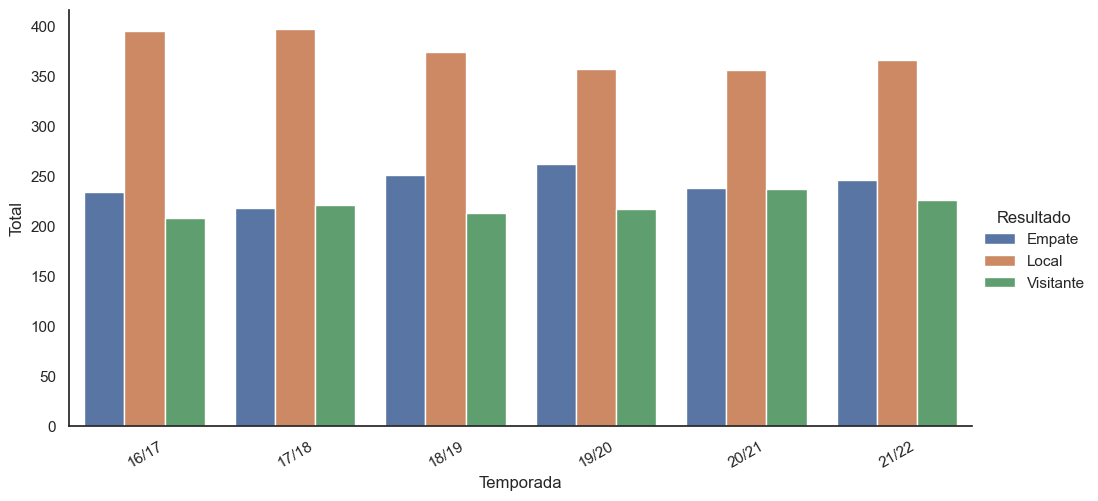

In [21]:
sns.set(style="white")
g = sns.catplot(x='Temporada'
                   ,y= 'Total'
                   ,hue='Resultado'
                   ,data= analisis3
                   ,kind='bar'
                   ,aspect=2)
g.set_xticklabels(rotation=30)